## Import the Modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from python_files.fetch_missing_data import fetch_missing_data
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor

## Clean the data

In [3]:
data = pd.read_csv('../data/AllMoviesDetailsCleaned.csv')
data.head()

/tmp/ipykernel_3113/1057679917.py:1: DtypeWarning: Columns (27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/AllMoviesDetailsCleaned.csv')


id   budget                 genres    imdb_id original_language  \
0   2        0            Drama|Crime  tt0094675                fi   
1   3        0           Drama|Comedy  tt0092149                fi   
2   5  4000000           Crime|Comedy  tt0113101                en   
3   6        0  Action|Thriller|Crime  tt0107286                en   
4   8    42000            Documentary  tt0825671                en   

                     original_title  \
0                             Ariel   
1              Varjoja paratiisissa   
2                        Four Rooms   
3                    Judgment Night   
4  Life in Loops (A Megacities RMX)   

                                            overview  popularity  \
0  Taisto Kasurinen is a Finnish coal miner whose...         NaN   
1  An episode in the life of Nikander, a garbage ...         NaN   
2  It's Ted the Bellhop's first night on the job....         NaN   
3  While racing to a boxing match, Frank, Mike, J...         NaN   
4  Timo Novotny labels his new project an experim...         NaN   

          production_companies      production_countries  ...  \
0  Villealfa Filmproduction Oy                   Finland  ...   
1  Villealfa Filmproduction Oy                   Finland  ...   
2                Miramax Films  United States of America  ...   
3           Universal Pictures                     Japan  ...   
4                      inLoops                   Austria  ...   

  production_companies_number  production_countries_number  \
0                           2                            1   
1                           1                            1   
2                           2                            1   
3                           3                            2   
4                           1                            1   

   spoken_languages_number budget_new revenue_new popularity_new  \
0                        2        NaN         NaN            NaN   
1                        3        NaN         NaN            NaN   
2                        1        NaN         NaN            NaN   
3                        1        NaN         NaN            NaN   
4                        5        NaN         NaN            NaN   

  vote_average_new  vote_count_new  belongs_to_collection_x  \
0              NaN             NaN                      NaN   
1              NaN             NaN                      NaN   
2              NaN             NaN                      NaN   
3              NaN             NaN                      NaN   
4              NaN             NaN                      NaN   

   belongs_to_collection  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 29 columns]

In [4]:
df= data.copy()

In [5]:
# 
df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True ) 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '21/10/1988' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/10/1986' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/12/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '15/10/1993' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '21/01/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/05/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '30/03/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/01/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/09/1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '23/12/1952' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/04/1961' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/11/1979' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/10/1976' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '20/03/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/03/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/07/1954' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '19/03/1963' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '28/06/1938' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '20/09/1946' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/07/1933' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/07/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '15/04/1955' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/08/1954' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/07/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/04/1968' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/02/1984' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/12/1982' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '26/07/1976' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '31/03/1914' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/09/1917' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '20/04/1982' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '17/12/1944' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '24/06/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '20/10/1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '20/11/1996' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/02/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/11/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '29/07/1952' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '24/06/1996' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '29/10/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '30/03/1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '30/05/1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '20/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '17/11/1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/09/1982' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/06/1973' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '21/05/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '17/11/1976' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '26/09/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '20/11/1969' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '20/08/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/09/1955' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/05/1973' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '20/05/1975' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/06/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '24/12/1978' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/06/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/01/1982' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/12/1996' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/10/1950' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/05/1983' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/02/1982' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/02/1943' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '28/12/1976' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/12/1957' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/03/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '30/01/1942' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '21/09/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '23/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/11/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '18/04/1946' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '28/11/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/11/1942' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '29/01/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '21/08/1938' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '18/12/1937' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/04/1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/08/1967' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '29/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '24/09/1933' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/05/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/12/1919' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '18/11/1933' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '30/01/1933' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '23/04/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/11/1939' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '19/11/1921' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/02/1921' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '26/02/1921' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/04/1922' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '15/04/1916' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '30/01/1955' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '19/07/1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '26/11/1982' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '26/08/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/10/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '15/11/1927' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '15/07/1927' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/01/1936' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '31/03/1988' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/09/1959' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/09/1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '30/04/1904' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '18/02/1943' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/12/1904' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '24/03/1904' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '30/12/1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/12/1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '30/04/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/11/1940' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '26/02/1941' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/10/1971' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/09/1971' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '24/09/1950' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '23/02/1914' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '24/10/1989' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '24/08/1931' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/02/1951' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '30/04/1922' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '30/08/1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '19/12/1966' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/12/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/04/1961' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/09/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '17/06/1974' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/09/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '29/06/1967' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/01/1969' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '18/10/1988' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/03/1928' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/10/1945' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '23/12/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '26/06/1932' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '23/01/1971' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '31/08/1930' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '15/10/1930' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '24/04/1932' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '14/06/1965' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '15/11/1960' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '31/03/1963' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '17/10/1934' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/04/1965' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '24/04/1927' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '31/03/1984' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '29/07/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '28/02/1900' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/03/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '18/11/1931' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/06/1963' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '26/07/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '28/01/1948' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '18/06/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '20/03/1984' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '21/09/1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '19/09/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '29/03/1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '21/06/1911' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '26/06/1984' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/06/1969' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '30/03/1938' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/09/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/02/1940' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '20/02/1940' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '26/04/1943' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '24/07/1952' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/11/1941' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '29/08/1977' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '28/06/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '29/11/1947' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/04/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/06/1984' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '17/02/1908' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/10/1959' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '24/12/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '19/02/1956' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '23/05/1977' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '20/08/1961' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/09/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '15/09/1951' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '19/03/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/03/1938' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '19/06/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/04/1942' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/04/1947' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/02/1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '27/06/1909' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '29/09/1909' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '23/02/1911' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/01/1911' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/04/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '28/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '28/07/1912' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '28/07/1906' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '18/09/1911' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '18/09/1918' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/04/1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '18/03/1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '31/05/1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '17/07/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '30/08/1977' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '21/01/1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/08/1942' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/07/1922' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '18/08/1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '28/01/1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '13/06/1929' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '19/09/1959' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '23/02/1949' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '18/10/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '19/09/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '21/10/1929' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '16/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '15/08/1914' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '20/05/1948' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '19/05/1916' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '23/03/1931' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '25/06/1930' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '21/06/1929' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '22/04/1917' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'].str.strip(), infer_datetime_format=True )
/tmp/ipykernel_3113/2177470377.py:2: UserWarning: Parsing '19/03/1956' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['release_date'] = 

In [6]:
df.shape

(329074, 29)

In [7]:
df.describe()

id        budget   popularity       revenue        runtime  \
count  329074.000000  3.290740e+05  4299.000000  3.290740e+05  292282.000000   
mean   252968.854899  8.683204e+05    19.862385  2.236717e+06      60.410877   
std    138638.645851  7.926402e+06    22.166717  2.788750e+07     142.495658   
min         2.000000  0.000000e+00     0.600000 -1.200000e+01       0.000000   
25%    124756.750000  0.000000e+00    10.097500  0.000000e+00       5.000000   
50%    276456.500000  0.000000e+00    14.922000  0.000000e+00      71.000000   
75%    370829.750000  0.000000e+00    22.589500  0.000000e+00      94.000000   
max    469219.000000  6.000000e+08   696.244000  2.920357e+09   51420.000000   

        vote_average     vote_count  production_companies_number  \
count  329074.000000  329074.000000                329074.000000   
mean        2.391715      28.757714                     0.594942   
std         3.134253     327.754144                     1.038569   
min         0.000000       0.000000                     0.000000   
25%         0.000000       0.000000                     0.000000   
50%         0.000000       0.000000                     0.000000   
75%         5.500000       1.000000                     1.000000   
max        10.000000   27803.000000                    26.000000   

       production_countries_number  spoken_languages_number    budget_new  \
count                329074.000000            329074.000000  4.299000e+03   
mean                      0.609993                 0.647669  2.012306e+07   
std                       0.665176                 0.672060  2.935169e+07   
min                       0.000000                 0.000000  0.000000e+00   
25%                       0.000000                 0.000000  5.000000e+05   
50%                       1.000000                 1.000000  9.080000e+06   
75%                       1.000000                 1.000000  2.700000e+07   
max                      26.000000                25.000000  3.800000e+08   

        revenue_new  popularity_new  vote_average_new  vote_count_new  
count  4.299000e+03     4299.000000       4299.000000     4299.000000  
mean   5.377283e+07       19.862385          6.385571     1136.667597  
std    1.126381e+08       22.166717          0.841871     2205.184719  
min    0.000000e+00        0.600000          0.000000        0.000000  
25%    3.963292e+06       10.097500          5.900000      151.000000  
50%    1.787369e+07       14.922000          6.400000      399.000000  
75%    5.524500e+07       22.589500          6.965000     1158.000000  
max    2.920357e+09      696.244000         10.000000    27803.000000

/home/sourav/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


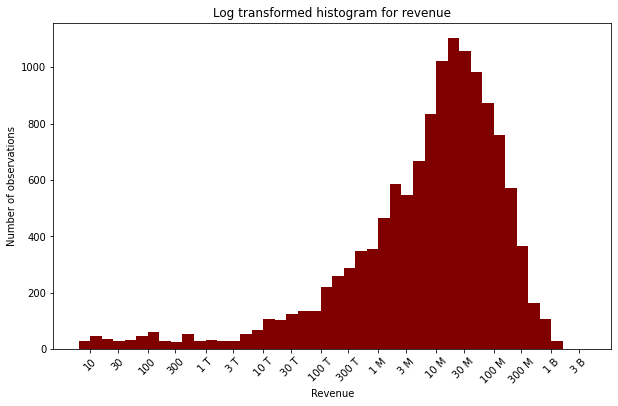

In [8]:
plt.figure(figsize=(10,6))
log_data = np.log10(df['revenue'] + 1) # add plus 1 to avoid log(0)
plt.xlabel('Revenue')
plt.ylabel('Number of observations')
plt.title('Log transformed histogram for revenue')
bin_edges = 10 ** np.arange(0.8, np.log10(df['revenue'].max()) + 0.2, 0.2)
plt.hist(df['revenue'], bins=bin_edges, color = 'maroon');
plt.xscale('log')
labels = [10, 30, 100, 300, '1 T', '3 T', '10 T', '30 T', '100 T', '300 T', '1 M', '3 M', '10 M', '30 M', '100 M', '300 M', '1 B', '3 B']
tick_locs = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000, 30000000, 100000000, 300000000, 1000000000, 3000000000]
plt.xticks(tick_locs, labels, rotation=45);

**Assumption:** We will only take data with revenue greater than 3K

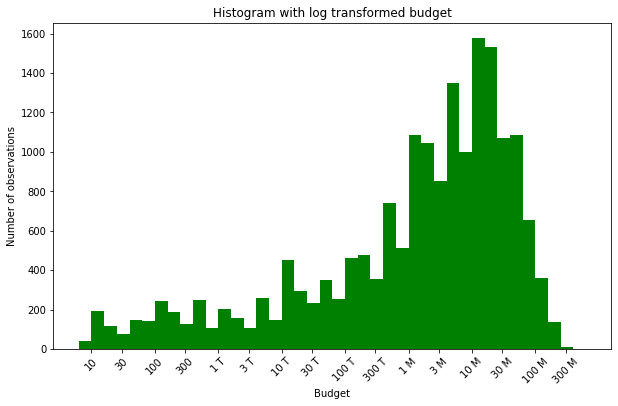

In [9]:
# log transforming the data
plt.figure(figsize=(10,6))
log_data = np.log10(df['budget'] + 1) # add plus 1 to avoid log(0)
plt.xlabel('Budget')
plt.ylabel('Number of observations')
plt.title('Histogram with log transformed budget')
bin_edges = 10 ** np.arange(0.8, np.log10(df['budget'].max()) + 0.2, 0.2)
plt.hist(df['budget'], bins=bin_edges, color = 'green');
plt.xscale('log')
labels = [10, 30, 100, 300, '1 T', '3 T', '10 T', '30 T', '100 T', '300 T', '1 M', '3 M', '10 M', '30 M', '100 M', '300 M']
tick_locs = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000, 30000000, 100000000, 300000000]
plt.xticks(tick_locs, labels, rotation=45);

In [10]:
df = df[(df['revenue'] > 3000) & (df['budget'] > 300000)]
df.shape

(8650, 29)

## Remove Duplicates

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(8644, 29)

## Split the data

In [13]:
# drop rows with null values in numeric variables
df.dropna( axis=0, how='any', subset=['release_date'], inplace= True )

In [14]:
X = df.drop(columns = ['revenue', 'budget_new', 'revenue_new', 'popularity_new', 'vote_average_new', 'vote_count_new',\
                      'belongs_to_collection_x'])
y = df['revenue']

In [15]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Handle Missing Data

In [16]:
X_train.isnull().sum()

id                                0
budget                            0
genres                          166
imdb_id                         157
original_language                 0
original_title                    0
overview                         64
popularity                     4247
production_companies              0
production_countries              0
release_date                      0
runtime                          12
spoken_languages                 54
status                            2
tagline                        2462
title                             0
vote_average                      0
vote_count                        0
production_companies_number       0
production_countries_number       0
spoken_languages_number           0
belongs_to_collection          5748
dtype: int64

In [17]:
X_train.popularity.replace(np.nan, 0, inplace= True)

In [18]:
# Sustituting the missing runtime value with mean 
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train[['runtime']] = imp_mean.fit_transform(X_train[['runtime']])

In [19]:
# substituing the empty genres with most common value: "comedy"
most_common_genres = df['genres'].describe()['top']
X_train['genres'] = X_train['genres'].apply(lambda x: most_common_genres if x == {} else x)  

In [20]:
X_train.isna().sum()

id                                0
budget                            0
genres                          166
imdb_id                         157
original_language                 0
original_title                    0
overview                         64
popularity                        0
production_companies              0
production_countries              0
release_date                      0
runtime                           0
spoken_languages                 54
status                            2
tagline                        2462
title                             0
vote_average                      0
vote_count                        0
production_companies_number       0
production_countries_number       0
spoken_languages_number           0
belongs_to_collection          5748
dtype: int64

## Convert the data types

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6902 entries, 208534 to 174
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           6902 non-null   int64         
 1   budget                       6902 non-null   int64         
 2   genres                       6736 non-null   object        
 3   imdb_id                      6745 non-null   object        
 4   original_language            6902 non-null   object        
 5   original_title               6902 non-null   object        
 6   overview                     6838 non-null   object        
 7   popularity                   6902 non-null   float64       
 8   production_companies         6902 non-null   object        
 9   production_countries         6902 non-null   object        
 10  release_date                 6902 non-null   datetime64[ns]
 11  runtime                      6902 non-n

In [22]:
X_train['popularity'] = pd.to_numeric(X_train['popularity'])

## Handle Outliers

## Scaling

In [23]:
numerical_features = df.drop(columns = ['id','budget_new',
       'revenue_new', 'popularity_new', 'vote_average_new', 'vote_count_new', 'revenue']).select_dtypes(include = ['int64', 'float64']).columns
print(numerical_features)
categorical_features = df.drop(columns = ['imdb_id']).select_dtypes(include = ['object']).columns
print(categorical_features)

Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count',
       'production_companies_number', 'production_countries_number',
       'spoken_languages_number'],
      dtype='object')
Index(['genres', 'original_language', 'original_title', 'overview',
       'production_companies', 'production_countries', 'spoken_languages',
       'status', 'tagline', 'title', 'belongs_to_collection_x',
       'belongs_to_collection'],
      dtype='object')


In [24]:
scaler = StandardScaler()

X_train_num = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]), columns= numerical_features)
X_train_num.head()

budget  popularity   runtime  vote_average  vote_count  \
0 -0.115782   -0.458262  0.730080      0.330122   -0.221046   
1  0.561304   -0.458262  0.357036     -0.142945   -0.347561   
2  1.373808   -0.458262  1.289646      0.613963   -0.422015   
3 -0.684534   -0.458262 -0.016008      0.424736   -0.486392   
4  0.398804   -0.458262  0.263775     -0.142945    0.701507   

   production_companies_number  production_countries_number  \
0                    -0.586547                    -0.323047   
1                     1.323277                     1.012084   
2                    -0.109091                    -0.323047   
3                     1.323277                     1.012084   
4                    -0.109091                    -0.323047   

   spoken_languages_number  
0                 0.762213  
1                -0.406852  
2                 0.762213  
3                 1.931279  
4                 0.762213

## Check the balancing

## Encoding categorical Data

## Feature Creation

## Feature Selection, Modelling, Feature Permutation

## Baseline Score

In [25]:
X_train_num.columns

Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count',
       'production_companies_number', 'production_countries_number',
       'spoken_languages_number'],
      dtype='object')

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X_train_num, y_train, cv = 10)

baseline_score = scores.mean()

print("Baseline Score: ", baseline_score)

Baseline Score:  0.6263793773632053
